## Logistic Model Tuning

- Bank Customer Churn Data


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) 

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score



In [10]:
bank_churn = pd.read_csv('bankchurn.csv')
bank_churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [11]:
X = bank_churn.drop('Exited', axis=1)
y = bank_churn['Exited']

## Fit a logistic regression on each of the variables individually

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

for col in X_train.columns:
    print(col)
    X_tr = X_train[[col]]
    X_te = X_test[[col]]
    lr_model = LogisticRegression()
    lr_model.fit(X_tr,y_train)
    y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
    print(log_loss(y_test,y_prob_pred_test))

CreditScore
0.4956652385542925
Age
0.455749289731628
Tenure
0.49562935542260045
Balance
0.6016056212030116
NumOfProducts
0.4952698369458492
HasCrCard
0.49571997240817295
IsActiveMember
0.4837630672509751
EstimatedSalary
0.5459025965457762
Gender_Male
0.4900978599495924
Geography_Germany
0.479398667545497
Geography_Spain
0.49327685483615685


In [13]:
# As usual, create our train/test split
# This will become particularly important as we calculate our error metrics

X_train, X_test, label_train, label_test = train_test_split(X, y, 
                                                            test_size=0.3, random_state=41)

In [14]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train, label_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, label_test)))



The score for logistic regression is
Training:  79.21%
Test set:  78.63%


In [15]:
logit.predict_proba(X_test)

array([[0.92994663, 0.07005337],
       [0.77764197, 0.22235803],
       [0.87513389, 0.12486611],
       ...,
       [0.80971122, 0.19028878],
       [0.90515169, 0.09484831],
       [0.90733812, 0.09266188]])

In [16]:
from sklearn.metrics import confusion_matrix

print("kNN confusion matrix: \n\n", confusion_matrix(label_test, knn.predict(X_test)))

kNN confusion matrix: 

 [[2282  101]
 [ 582   35]]


In [30]:
# Let's make a slightly better model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lm = LogisticRegression(C = 100, max_iter = 1000)
lm.fit(X_train, y_train)
print("Logistic score: {:6.4f}".format(lm.score(X_train,y_train)), 
                                                  f1_score(y_test, y_predict, average='weighted'))

Logistic score: 0.7868 0.740758344842571


In [18]:
def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

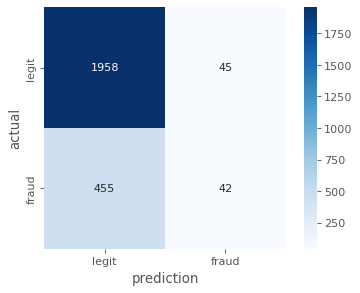

In [19]:
make_confusion_matrix(lm)

In [20]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(lm, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [26]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = lm.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)), 
                                                  f1_score(y_test, y_predict, average='weighted'))

Default threshold:
Precision: 0.4828,   Recall: 0.0845 0.7390789408378003


In [27]:
# using the new threshold of 0.3
y_predict = (lm.predict_proba(X_test)[:,1] > 0.3)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)), 
                                                  f1_score(y_test, y_predict, average='weighted'))

Threshold of 0.06:
Precision: 0.3498,   Recall: 0.3702 0.740758344842571


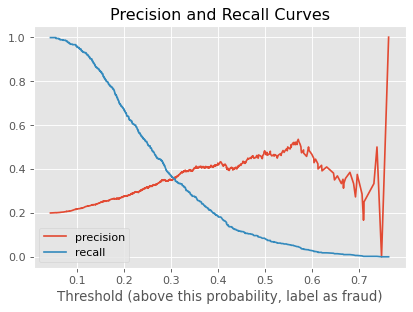

In [46]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

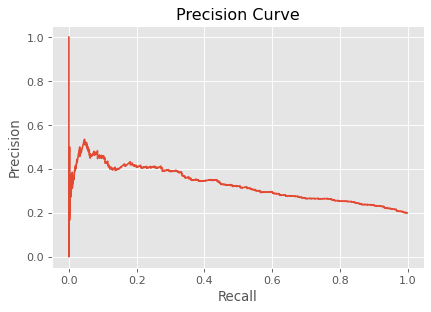

In [56]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Curve");

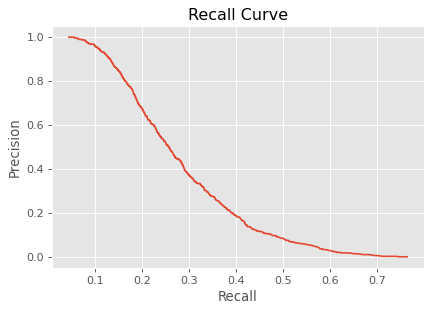

In [55]:

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall Curve");

In [49]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])

ROC AUC score =  0.6710668403832882


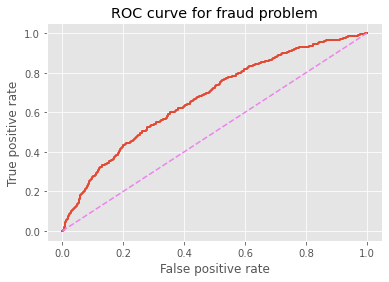

In [50]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve ');
print("ROC AUC score = ", roc_auc_score(y_test, lm.predict_proba(X_test)[:,1]))